In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data/NOUN_Sorting_Tables.xlsx', usecols=[1,2,3], skiprows=1)
distance_mt = df.pivot(index='Stim_1', columns='Stim_2', values='Distance')

#distance_mt['I_2001'] = 0
distance_mt.insert(0, 'I_2001', 0)
distance_mt.loc[len(distance_mt)] = 0
distance_mt = distance_mt.rename(index={63: 'I_2064'}).fillna(0)

C:\Users\hw9335\Anaconda3\envs\gurobi\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


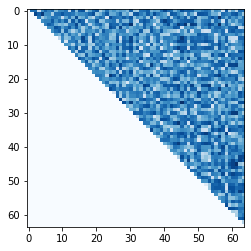

In [3]:
plt.imshow(distance_mt, zorder=2, cmap='Blues', interpolation='nearest')
distance_mt = distance_mt + distance_mt.T

39.69502518123123

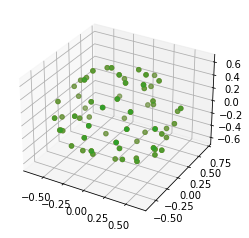

In [4]:
from sklearn.manifold import MDS
from mpl_toolkits import mplot3d
model = MDS(n_components=3, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(distance_mt)

#plt.scatter(out[:, 0], out[:, 1])

ax = plt.axes(projection='3d')
# for s in model.feature_names_in_:
for s in ['I_2002', 'I_2031', 'I_2037']:
    ax.scatter3D(out[:, 0], out[:, 1], out[:, 2], label=s)

model.stress_

In [5]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering().fit(distance_mt)

C:\Users\hw9335\Anaconda3\envs\gurobi\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


In [6]:
clustering.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)